# Importação das bases de dados do Censo Escolar (1996 a 2022)

Os arquivos aqui importados podem ser encontradas no [portal do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar).

## Sobre metodologia

Os arquivos do censo são organizados por ano e para cada pasta de cada ano existe a seguinte estrutura de arquivos:

- Pasta `Anexos`: Com os arquivos auxiliares como o dicionário de dados e o questionário que foi utilizado para colhimento das respostas. O Arquivo de dicionário de dados é fundamental para entender o significado de cada coluna disponível nos microdados.
- Pasta `Dados`: Com os arquivos que armazenam os microdados do censo. Eles são dispostos em dois formatos: .CSV e .TXT. Aqui damos preferência aos arquivos .CSV.
- Pasta `Leia-me`: Contém o `Manual do usuário` para o entendimento dos dados ali disponíveis.

Devido ao tamanho dos arquivos de dados e priorização de ter um ambiente virtual que pudesse de fácil acesso independente da máquina de trabaho da pessoa pesquisadora, todos os arquivos .CSV referente aos dados de cada ano foram adicionados a uma pasta na plataforma Google Drive e para a construção das análises e limpezas de dados foi utilizada a ferramenta Google Colab, que permite a construção de scripts de código Python através do acesso pele navegador.

In [1]:
import pandas as pd

censo = []

## Dados de 2022

In [2]:
%%time

dados2022 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2022.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2022
censo.append(dados)

dados2022.head(5)

CPU times: user 4.16 s, sys: 722 ms, total: 4.89 s
Wall time: 7.45 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EIEEF HAP BITT TUPARI,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0
1,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,CEEJA LUIZ VAZ DE CAMOES,...,132.0,0.0,10.0,15.0,0.0,0.0,0.0,10.0,0.0,0.0
2,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMMEF 7 DE SETEMBRO,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMEIEF ANA NERY,...,62.0,0.0,22.0,8.0,1.0,7.0,0.0,8.0,7.0,0.0
4,2022,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,EMEIEF BOA ESPERANCA,...,91.0,0.0,0.0,20.0,1.0,19.0,0.0,9.0,8.0,0.0


### Fazendo uma validação dos dados importados com outras fontes de referência

Verificando se o identificador da escola de repete:

In [3]:
print('Existem {} linhas nesse arquivo, o que em teoria significa que são {} escolas diferentes.'.format(len(dados2022), len(dados2022)))

Existem 224649 linhas nesse arquivo, o que em teoria significa que são 224649 escolas diferentes.


In [4]:
dados2022[dados2022.duplicated('CO_ENTIDADE')]

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED


Acima verificamos se os valores da coluna `CO_ENTIDADE` se repetem. Isso é importante para entendermos cada escola está sendo referenciada apenas uma vez ou não, o que poderia influenciar na nossa análise.

Como a consulta não retornou nenhuma linha, sabemos que as escolas não se repetem pelo sei código de identificação.


Filtrando pelo situação de funcionamento da escola para considerar apenas as escolas ativas:

In [5]:
dados2022Ativ = dados2022.loc[(dados2022['TP_SITUACAO_FUNCIONAMENTO'] == 1)]

dados2022Ativ[['NU_ANO_CENSO', 'CO_ENTIDADE']].groupby(['NU_ANO_CENSO']).count().reset_index()

,NU_ANO_CENSO,CO_ENTIDADE
0,2022,184332


Visto que o 'CO_ENTIDADE' não se repete, existem 184 mil escolas ativas.

No censo mas vimos que existe uma coluna que identifica apenas as escolas que atendem a educação básica, vamos filtrar por ela agora:

In [6]:
dados2022Ativ = dados2022.loc[(dados2022['TP_SITUACAO_FUNCIONAMENTO'] == 1) & (dados2022['IN_BAS'] == 1)]

dados2022Ativ[['NU_ANO_CENSO', 'CO_ENTIDADE']].groupby(['NU_ANO_CENSO']).count().reset_index()

,NU_ANO_CENSO,CO_ENTIDADE
0,2022,178346


In [7]:
dados2022Ativ[['QT_MAT_BAS']].sum()

QT_MAT_BAS    47382074.0
dtype: float64

Com os filtros acima chegamos ao mesmo número descrito no [relatório do técnico do censo escolar de 2022](https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/resumo_tecnico_censo_escolar_2022.pdf) quando falam sobre a quantidade de matrículas e de escolas do censo de 2022 para a educação básica.

> *"No ano de 2022, registraram-se 47,4 milhões de matrículas nas 178,3 mil escolas de educação básica no Brasil"*

Agora daremos sequencia a importação dos dados dos outros anos, usando as mesmas colunas para que possamos entender como determinados indicadores se comportaram ao longo dos anos.


## Dados de 2021

In [8]:
%%time

dados2021 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2021.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2021
censo.append(dados)

dados2021.head(5)

CPU times: user 3.78 s, sys: 510 ms, total: 4.29 s
Wall time: 7.27 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,8.0,1.0,0.0,1.0,0.0,5.0,5.0,0.0
1,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,153.0,0.0,8.0,14.0,0.0,0.0,0.0,11.0,0.0,0.0
2,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,8.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,52.0,0.0,22.0,10.0,1.0,9.0,0.0,8.0,7.0,0.0
4,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024666,...,88.0,0.0,0.0,15.0,1.0,14.0,0.0,9.0,8.0,0.0


## Dados de 2020

In [9]:
%%time

dados2020 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2020.CSV', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2020
censo.append(dados)

dados2020.head(5)

CPU times: user 4.1 s, sys: 532 ms, total: 4.64 s
Wall time: 7.24 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,0.0
1,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,158.0,0.0,13.0,18.0,0.0,0.0,0.0,12.0,0.0,0.0
2,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,10.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,60.0,0.0,26.0,8.0,1.0,8.0,0.0,9.0,8.0,0.0
4,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados de 2019

In [10]:
%%time

dados2019 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2019.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2019
censo.append(dados)

dados2019.head(5)

CPU times: user 3.82 s, sys: 387 ms, total: 4.21 s
Wall time: 7.58 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2019,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2019,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,138.0,0.0,12.0,20.0,0.0,0.0,0.0,13.0,0.0,0.0
2,2019,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,11.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2019,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,55.0,0.0,28.0,7.0,1.0,6.0,0.0,8.0,7.0,0.0
4,2019,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados de 2018

In [11]:
%%time

dados2018 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2018.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2018
censo.append(dados)

dados2018.head(5)

CPU times: user 3.71 s, sys: 290 ms, total: 4 s
Wall time: 6.15 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2018,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,1.0,0.0,10.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2018,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,139.0,0.0,14.0,18.0,0.0,0.0,0.0,13.0,0.0,0.0
2,2018,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,22.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2018,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,51.0,0.0,31.0,9.0,1.0,8.0,0.0,9.0,8.0,0.0
4,2018,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados de 2017

In [12]:
%%time

dados2017 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2017.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2017
censo.append(dados)

dados2017.head(5)

CPU times: user 3.27 s, sys: 484 ms, total: 3.76 s
Wall time: 5.33 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2017,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,12.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2017,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,233.0,0.0,16.0,29.0,0.0,0.0,0.0,21.0,0.0,0.0
2,2017,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,19.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2017,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,53.0,0.0,33.0,9.0,1.0,8.0,0.0,9.0,8.0,0.0


## Dados de 2016

In [13]:
%%time

dados2016 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2016.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2016
censo.append(dados)

dados2016.head(5)

CPU times: user 4.85 s, sys: 421 ms, total: 5.27 s
Wall time: 11.9 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2016,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,12.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2016,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,256.0,0.0,22.0,34.0,0.0,0.0,0.0,18.0,0.0,0.0
2,2016,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,16.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2016,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,52.0,0.0,35.0,10.0,2.0,8.0,0.0,10.0,8.0,0.0


## Dados de 2015

In [14]:
%%time

dados2015 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2015.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())


dados = dados2015
censo.append(dados)

dados2015.head(5)

CPU times: user 2.76 s, sys: 268 ms, total: 3.03 s
Wall time: 4.77 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2015,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,9.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2015,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,283.0,0.0,22.0,37.0,0.0,0.0,0.0,18.0,0.0,0.0
2,2015,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,17.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2015,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,41.0,0.0,6.0,10.0,1.0,9.0,0.0,9.0,8.0,0.0


## Dados de 2014

In [15]:
%%time

dados2014 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2014.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2014
censo.append(dados)

dados2014.head(5)

CPU times: user 2.83 s, sys: 275 ms, total: 3.1 s
Wall time: 5.02 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2014,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,9.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2014,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,295.0,0.0,30.0,41.0,0.0,0.0,0.0,18.0,0.0,0.0
2,2014,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,18.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2014,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,...,52.0,0.0,8.0,11.0,1.0,10.0,0.0,10.0,9.0,0.0


## Dados de 2013

In [16]:
%%time

dados2013 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2013.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2013
censo.append(dados)

dados2013.head(5)

CPU times: user 3.39 s, sys: 274 ms, total: 3.67 s
Wall time: 6.21 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2013,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2013,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,365.0,0.0,29.0,40.0,0.0,0.0,0.0,19.0,0.0,0.0
2,2013,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,10.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2013,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2013,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados de 2012

In [17]:
%%time

dados2012 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2012.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2012
censo.append(dados)

dados2012.head(5)

CPU times: user 2.77 s, sys: 281 ms, total: 3.05 s
Wall time: 4.58 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2012,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,9.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2012,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,371.0,2.0,22.0,42.0,0.0,0.0,0.0,21.0,0.0,0.0
2,2012,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,13.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2012,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2012,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados de 2011

In [18]:
%%time

dados2011 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2011.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2011
censo.append(dados)

dados2011.head(5)

CPU times: user 3.12 s, sys: 314 ms, total: 3.43 s
Wall time: 4.86 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2011,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2011,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,387.0,2.0,10.0,45.0,0.0,0.0,0.0,21.0,0.0,0.0
2,2011,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,12.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2011,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2011,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


## Dados de 2010

In [19]:
%%time

dados2010 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2010.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2010
censo.append(dados)

dados2010.head(5)

CPU times: user 2.73 s, sys: 214 ms, total: 2.95 s
Wall time: 4.6 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2010,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2010,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,431.0,2.0,9.0,46.0,0.0,0.0,0.0,20.0,0.0,0.0
2,2010,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,12.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2010,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,8.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2010,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


## Dados de 2009

In [20]:
%%time

dados2009 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2009.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2009
censo.append(dados)

dados2009.head(5)

CPU times: user 2.37 s, sys: 235 ms, total: 2.6 s
Wall time: 4.1 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2009,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,9.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2009,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,478.0,5.0,10.0,34.0,0.0,0.0,0.0,21.0,0.0,0.0
2,2009,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,11.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2009,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2009,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,8.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


## Dados de 2008

In [21]:
%%time

dados2008 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2008.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2008
censo.append(dados)

dados2008.head(5)

CPU times: user 2.48 s, sys: 247 ms, total: 2.72 s
Wall time: 4.34 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2008,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,0.0,10.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2008,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,480.0,2.0,12.0,37.0,0.0,0.0,0.0,20.0,0.0,0.0
2,2008,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,9.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2008,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2008,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,8.0,0.0,0.0,9.0,0.0,9.0,0.0,5.0,5.0,0.0


## Dados de 2007

In [22]:
%%time

dados2007 = pd.read_csv('/content/drive/MyDrive/dados/microdados_ed_basica_2007.csv', 
                        sep=';', 
                        encoding='latin-1',
                        usecols = '''NU_ANO_CENSO NO_REGIAO CO_REGIAO NO_UF SG_UF CO_UF NO_MUNICIPIO NO_MESORREGIAO NO_MICRORREGIAO \
                        NO_ENTIDADE CO_ENTIDADE TP_DEPENDENCIA TP_CATEGORIA_ESCOLA_PRIVADA TP_LOCALIZACAO TP_LOCALIZACAO_DIFERENCIADA \
                        TP_SITUACAO_FUNCIONAMENTO QT_MAT_BAS QT_MAT_INF QT_MAT_FUND QT_MAT_MED QT_MAT_PROF QT_MAT_PROF_TEC QT_MAT_EJA \
                        QT_MAT_ESP QT_MAT_BAS_FEM QT_MAT_BAS_MASC QT_MAT_BAS_ND QT_MAT_BAS_BRANCA QT_MAT_BAS_PRETA QT_MAT_BAS_PARDA \
                        QT_MAT_BAS_AMARELA QT_MAT_BAS_INDIGENA QT_DOC_BAS QT_DOC_MED QT_DOC_INF QT_DOC_FUND QT_TUR_BAS QT_TUR_FUND \
                        QT_TUR_MED IN_BAS IN_INF IN_INF_CRE IN_INF_PRE IN_FUND IN_FUND_AI IN_FUND_AF IN_MED IN_PROF IN_PROF_TEC IN_EJA \
                        IN_EJA_FUND IN_EJA_MED IN_ESP IN_ESP_CC IN_ESP_CE '''.split())

dados = dados2007
censo.append(dados)

dados2007.head(5)

CPU times: user 2.79 s, sys: 202 ms, total: 2.99 s
Wall time: 5.41 s


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,...,QT_MAT_BAS_PARDA,QT_MAT_BAS_AMARELA,QT_MAT_BAS_INDIGENA,QT_DOC_BAS,QT_DOC_INF,QT_DOC_FUND,QT_DOC_MED,QT_TUR_BAS,QT_TUR_FUND,QT_TUR_MED
0,2007,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,...,0.0,1.0,13.0,5.0,0.0,5.0,0.0,1.0,1.0,0.0
1,2007,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,...,506.0,2.0,8.0,1.0,0.0,1.0,0.0,17.0,0.0,0.0
2,2007,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,...,7.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0
3,2007,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024313,...,0.0,0.0,0.0,9.0,0.0,9.0,0.0,1.0,1.0,0.0
4,2007,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024348,...,7.0,0.0,0.0,8.0,1.0,8.0,0.0,6.0,6.0,0.0


## Dados de 2006

A partir desse ano as bases de dados começam a ter o tamanho de 1G ou mais.

### Esse é o ponto de trabalho atual desse caderno
Responder as perguntas 
- Por que isso acontece? 
- Existe uma outra forma de exportar/manusear esses dados?

E dar sequencia a importação dos anos faltantes.

## Dados de 2005

## Dados de 2004

## Dados de 2003

## Dados de 2002

## Dados de 2001

## Dados de 2000

## Dados de 1999

## Dados de 1998

## Dados de 1997

## Dados de 1996

Olhando o Dicionário de Dados da base de 1996 é possível observar que a estrutura de análise muda muito, 
tanto a nomenclatura dos dados quando a forma de contagem de cada indicador, por exemplo, o número de docentes é apresentado
de acordo a sua formação, para cada uma das formações possíveis (visível na imagem abaixo).

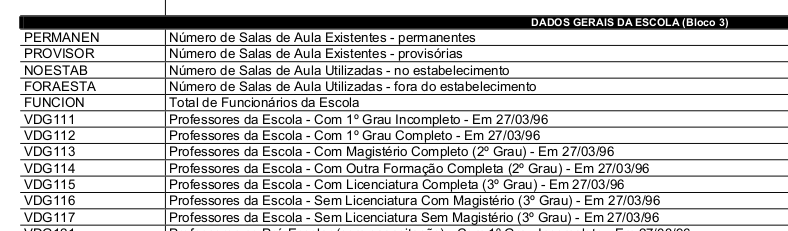

Dessa forma, se faz necessário uma análise mais elaborada de como é possível relacionar os dois formatos diferentes das bases que descrevem o censo escolar.

In [23]:
%%time

dados1996 = pd.read_csv('/content/drive/MyDrive/dados/CENSOESC_1996.CSV', 
                        sep='|', 
                        encoding='latin-1',
                        usecols = '''MASCARA ANO CODMUNIC UF SIGLA MUNIC DEP LOC CODFUNC'''.split())

dados1996.head(5)

CPU times: user 2.87 s, sys: 210 ms, total: 3.08 s
Wall time: 4.76 s


,MASCARA,ANO,CODMUNIC,UF,SIGLA,MUNIC,DEP,LOC,CODFUNC
0,20030313,1996,110100100205,Rondonia,RO,PORTO VELHO,Particular,Urbana,Ativo
1,20071835,1996,110100100205,Rondonia,RO,PORTO VELHO,Estadual,Urbana,Ativo
2,20043593,1996,110100100205,Rondonia,RO,PORTO VELHO,Municipal,Urbana,Extinto
3,20043595,1996,110100100205,Rondonia,RO,PORTO VELHO,Municipal,Urbana,Ativo
4,20043600,1996,110100100205,Rondonia,RO,PORTO VELHO,Particular,Urbana,Ativo


## Reunindo os dados de todos os anos em 1 Dataframe

Aqui reunimos apenas as bases de dados que estão padronizadas, ou seja, das quais foram possíveis extrair as mesma colunas - são elas as de 2022 até 2007.

E depois salvamos em um outro arquivo para que tenhamos apenas 1 arquivo base para as análise que serão realizadas.

In [24]:
censoEscolar = pd.concat(censo)

censoEscolar[['NU_ANO_CENSO', 'CO_ENTIDADE']].groupby(['NU_ANO_CENSO']).count().reset_index()

,NU_ANO_CENSO,CO_ENTIDADE
0,2007,198507
1,2008,205699
2,2009,203455
3,2010,200876
4,2011,242147
5,2012,242136
6,2013,242680
7,2014,242929
8,2015,237879
9,2016,237506


In [25]:
%%time

censoEscolar.to_csv('drive/MyDrive/dados/output/baseCensoEscolar_230524.csv', index=False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
